# Import data

Import data Susenas 2012 - individual level

In [28]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
# import random

In [29]:
# Susenas 2012
sus12_ki = pd.read_csv('../susenas12/sn12_ki.csv')
sus12_kr = pd.read_csv('../susenas12/sn12_krt.csv')

In [30]:
sus12_ki

,URUT,B1R1,B1R2,B1R5,B1R8,NART,HB,JK,UMUR,KWN,...,B5R34C2,B5R34C3,B5R35,B5R36,B5R37,B5R38,B5R38L,KABU,EXP_CAP,WEIND
0,110112500101601,11,1,1,1,1,1,1,41,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
1,110112500101601,11,1,1,1,2,2,2,30,2,...,0.0,0.0,1.0,4.0,NaN,NaN,NaN,1101,3.434643e+05,45.876255
2,110112500101601,11,1,1,1,3,3,2,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
3,110112500101601,11,1,1,1,4,3,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
4,110112500101602,11,1,1,2,1,1,1,35,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,5.703095e+05,55.252186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114440,947122001103810,94,71,2,10,2,2,2,37,2,...,0.0,0.0,3.0,NaN,1.0,NaN,NaN,9471,1.348310e+06,6.000000
1114441,947122001103810,94,71,2,10,3,3,1,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000
1114442,947122001103810,94,71,2,10,4,3,2,9,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000
1114443,947122001103810,94,71,2,10,5,7,2,46,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000


In [31]:
sus12_kr

,URUT,B1R1,B1R2,B1R5,B1R8,B1R11,B2R1,B2R2,B2R3,B2R4,...,B8R2A,B8R2B,B8R2C,B8R3A,B8R3B,B9R1A,B9R1B,KABU,EXP_CAP,WERT
0,110112500101601,11,1,1,1,1,4,1,3,2,...,1,2.0,2.0,2,2,8,2,1101,3.434643e+05,45.876255
1,110112500101602,11,1,1,2,1,4,0,4,2,...,1,2.0,2.0,2,2,18,2,1101,5.703095e+05,55.252186
2,110112500101603,11,1,1,3,1,4,0,4,4,...,1,4.0,4.0,1,1,18,1,1101,1.305774e+06,20.006414
3,110112500101604,11,1,1,4,1,6,2,4,3,...,1,3.0,3.0,2,2,18,1,1101,4.017619e+05,42.398369
4,110112500101605,11,1,1,5,1,4,1,3,2,...,1,1.0,1.0,2,2,1,1,1101,7.000714e+05,43.420265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286108,947122001103806,94,71,2,6,1,5,2,3,3,...,1,3.0,3.0,2,1,18,1,9471,1.648210e+06,438.129364
286109,947122001103807,94,71,2,7,1,5,0,5,4,...,1,5.0,6.0,1,1,18,1,9471,1.959000e+06,321.015991
286110,947122001103808,94,71,2,8,1,2,0,2,2,...,1,2.0,2.0,2,2,13,2,9471,2.233357e+06,324.770111
286111,947122001103809,94,71,2,9,1,7,0,7,6,...,1,5.0,5.0,2,1,1,2,9471,7.117279e+05,14.112268


In [32]:
total_pop=sus12_ki['WEIND'].sum()
print('{:,.0f}'.format(total_pop))

245,138,422


In [33]:
# Creating Count Statistics for Our Datasets
sus12_kr_desc = sus12_kr['URUT'].agg(['count','nunique']).transpose()
sus12_ki_desc = sus12_ki['URUT'].agg(['count','nunique']).transpose()

plot_describe = pd.concat([sus12_ki_desc,sus12_kr_desc],axis=1)
plot_describe.columns=['2012 Individu','2012 Ruta']
lst = list(plot_describe.columns)
for c in lst:
    plot_describe[c] = plot_describe[c].astype(int).apply(lambda x: f'{x:,}')
    
plot_describe
# The figure below explains why we choose only 2012 Susenas Data

,2012 Individu,2012 Ruta
count,"1,114,445","286,113"
nunique,"286,113","286,113"


# Choose variables

In [34]:
# Subsetting Dataset to Selected Variables
df_raw = sus12_ki[['URUT','B1R1','B1R2','B1R5','JK','UMUR','KWN','B5R14','B5R17','B5R22','EXP_CAP','WEIND']]

# Creating District Identifier
df_raw=df_raw.assign(bps_2009=df_raw['B1R1']*100+df_raw['B1R2'])
df_raw

,URUT,B1R1,B1R2,B1R5,JK,UMUR,KWN,B5R14,B5R17,B5R22,EXP_CAP,WEIND,bps_2009
0,110112500101601,11,1,1,1,41,2,3.0,8.0,NaN,3.434643e+05,45.876255,1101
1,110112500101601,11,1,1,2,30,2,3.0,8.0,NaN,3.434643e+05,45.876255,1101
2,110112500101601,11,1,1,2,5,1,2.0,1.0,NaN,3.434643e+05,45.876255,1101
3,110112500101601,11,1,1,1,0,1,NaN,NaN,NaN,3.434643e+05,45.876255,1101
4,110112500101602,11,1,1,1,35,2,3.0,5.0,NaN,5.703095e+05,55.252186,1101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114440,947122001103810,94,71,2,2,37,2,2.0,8.0,NaN,1.348310e+06,6.000000,9471
1114441,947122001103810,94,71,2,1,10,1,2.0,1.0,NaN,1.348310e+06,6.000000,9471
1114442,947122001103810,94,71,2,2,9,1,2.0,1.0,NaN,1.348310e+06,6.000000,9471
1114443,947122001103810,94,71,2,2,46,1,3.0,5.0,NaN,1.348310e+06,6.000000,9471


# Slice dataset

In [35]:
df_age = df_raw.loc[(df_raw['UMUR']>=5) & (df_raw['UMUR']<=24)]
df_age

,URUT,B1R1,B1R2,B1R5,JK,UMUR,KWN,B5R14,B5R17,B5R22,EXP_CAP,WEIND,bps_2009
2,110112500101601,11,1,1,2,5,1,2.0,1.0,NaN,3.434643e+05,45.876255,1101
6,110112500101602,11,1,1,2,9,1,2.0,1.0,NaN,5.703095e+05,55.252186,1101
7,110112500101602,11,1,1,2,5,1,1.0,NaN,5.0,5.703095e+05,55.252186,1101
10,110112500101603,11,1,1,1,22,1,2.0,8.0,NaN,1.305774e+06,20.006414,1101
11,110112500101603,11,1,1,1,10,1,2.0,1.0,NaN,1.305774e+06,20.006414,1101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114437,947122001103809,94,71,2,1,14,1,2.0,2.0,NaN,7.117279e+05,14.112268,9471
1114438,947122001103809,94,71,2,1,6,1,2.0,1.0,NaN,7.117279e+05,14.112268,9471
1114441,947122001103810,94,71,2,1,10,1,2.0,1.0,NaN,1.348310e+06,6.000000,9471
1114442,947122001103810,94,71,2,2,9,1,2.0,1.0,NaN,1.348310e+06,6.000000,9471


In [36]:
df_quit = df_age.loc[(df_age['B5R14']>=1) | (df_age['B5R14']<=3)]
df_quit

,URUT,B1R1,B1R2,B1R5,JK,UMUR,KWN,B5R14,B5R17,B5R22,EXP_CAP,WEIND,bps_2009
2,110112500101601,11,1,1,2,5,1,2.0,1.0,NaN,3.434643e+05,45.876255,1101
6,110112500101602,11,1,1,2,9,1,2.0,1.0,NaN,5.703095e+05,55.252186,1101
7,110112500101602,11,1,1,2,5,1,1.0,NaN,5.0,5.703095e+05,55.252186,1101
10,110112500101603,11,1,1,1,22,1,2.0,8.0,NaN,1.305774e+06,20.006414,1101
11,110112500101603,11,1,1,1,10,1,2.0,1.0,NaN,1.305774e+06,20.006414,1101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114437,947122001103809,94,71,2,1,14,1,2.0,2.0,NaN,7.117279e+05,14.112268,9471
1114438,947122001103809,94,71,2,1,6,1,2.0,1.0,NaN,7.117279e+05,14.112268,9471
1114441,947122001103810,94,71,2,1,10,1,2.0,1.0,NaN,1.348310e+06,6.000000,9471
1114442,947122001103810,94,71,2,2,9,1,2.0,1.0,NaN,1.348310e+06,6.000000,9471


In [37]:
df_quit_desc = df_quit['URUT'].agg(['count','nunique']).transpose()
df_quit_desc

count      406950
nunique    210244
Name: URUT, dtype: int64

In [38]:
df_quit['B5R22'].value_counts()

1.0     39185
5.0     30059
11.0    20200
2.0     19800
3.0     12359
4.0      9382
7.0      3319
8.0      1651
6.0       871
9.0       804
10.0      341
Name: B5R22, dtype: int64

# Sanity Check

In [39]:
df_quit.describe()

,URUT,B1R1,B1R2,B1R5,JK,UMUR,KWN,B5R14,B5R17,B5R22,EXP_CAP,WEIND,bps_2009
count,4.069500e+05,406950.000000,406950.000000,406950.000000,406950.000000,406950.000000,406950.000000,406950.000000,368525.000000,137971.000000,4.069500e+05,406950.000000,406950.000000
mean,4.325290e+14,43.031741,21.937245,1.578879,1.485590,13.481492,1.084145,2.150193,3.102598,4.190721,5.988987e+05,218.299335,4325.111345
std,2.552888e+14,25.555091,26.551718,0.493739,0.499793,5.513846,0.290454,0.562565,2.884781,3.353074,6.871373e+05,211.199187,2552.883167
min,1.101125e+14,11.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,6.707492e+04,1.000000,1101.000000
25%,1.709220e+14,17.000000,4.000000,1.000000,1.000000,9.000000,1.000000,2.000000,1.000000,1.000000,2.913691e+05,79.264511,1709.000000
50%,3.513220e+14,35.000000,9.000000,2.000000,1.000000,13.000000,1.000000,2.000000,2.000000,3.000000,4.308620e+05,141.862350,3513.000000
75%,6.408220e+14,64.000000,24.000000,2.000000,2.000000,18.000000,1.000000,2.000000,5.000000,5.000000,6.904948e+05,287.013290,6408.000000
max,9.471220e+14,94.000000,79.000000,2.000000,2.000000,24.000000,4.000000,3.000000,15.000000,11.000000,7.529981e+07,3151.935791,9471.000000


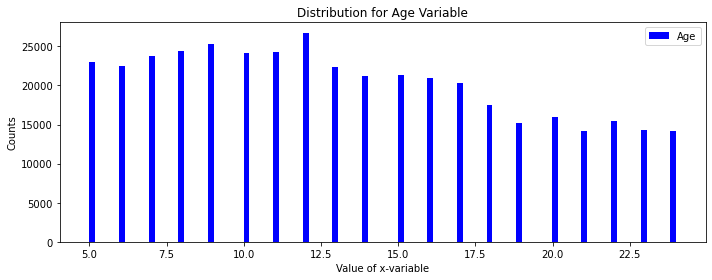

In [40]:
# Histogram for Age Variable
plot_umur = df_quit['UMUR']

plot_umur.plot.hist(grid=False, bins=99, rwidth=1,color='blue',label='Age')
plt.title('Distribution for Age Variable')
plt.xlabel('Value of x-variable')
plt.ylabel('Counts')
plt.legend(loc="best")
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()

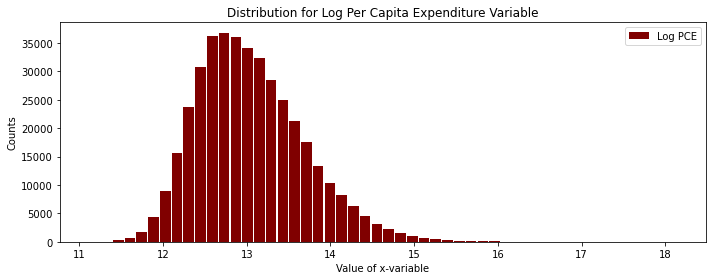

In [42]:
# Histogram for Log Expenditure per Capita Variable

df_quit=df_quit.assign(log_exp_cap=np.log(df_quit['EXP_CAP']))
plot_exp = df_quit['log_exp_cap']

plot_exp.plot.hist(grid=False, bins=50, rwidth=0.9,color='maroon',label='Log PCE')
plt.title('Distribution for Log Per Capita Expenditure Variable')
plt.xlabel('Value of x-variable')
plt.ylabel('Counts')
plt.legend(loc="best")
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()

# Cleaning process

In [43]:
# Education Certif

certif = [(df_quit['B5R17']==np.nan),(df_quit['B5R17']==1), (df_quit['B5R17']==2), (df_quit['B5R17']==3),
          (df_quit['B5R17']==4), (df_quit['B5R17']==5), (df_quit['B5R17']==6),
          (df_quit['B5R17']==7), (df_quit['B5R17']==8), (df_quit['B5R17']==9),
          (df_quit['B5R17']==10), (df_quit['B5R17']==11), (df_quit['B5R17']==12),
          (df_quit['B5R17']==13), (df_quit['B5R17']==14), (df_quit['B5R17']==15)]

yofs = [0,3,6,6,6,9,9,9,12,12,12,12,14,15,16,18]

df_quit['yrs_school']=np.select(certif,yofs)

In [44]:
df_sliced = df_quit

In [48]:
# Create Status Variable

df_sliced.loc[df_sliced['B1R5']==1,'urban']=1
df_sliced.loc[df_sliced['B1R5']==2,'urban']=0

df_sliced.loc[df_sliced['B5R14']==1,'school_participation']=0
df_sliced.loc[df_sliced['B5R14']==2,'school_participation']=1
df_sliced.loc[df_sliced['B5R14']==3,'school_participation']=0

# # Drop Unnecessary Data
# df_sliced = df_sliced.drop(columns=['B1R1','B1R2','B1R5','B5R17','B5R20','B5R21E'],axis=1)

# # Making Some Variable as Integer
# lst2 = ['yrs_school','inet_access','inet_mobile','urban']
# for c in lst2:
#     df_sliced[c] = df_sliced[c].astype(int)

# # Creating Log PCE Data
# df_sliced=df_sliced.assign(log_exp_cap=np.log(df_sliced['EXP_CAP']))

# df_sliced

# Collapsing to District Level

In [49]:
# Creating Lambda Function for Weighted Average and Weighted Sum
wt_mean = lambda x: np.average(x, weights=df_sliced.loc[x.index, "WEIND"])
wt_sum = lambda x: np.sum(x, weights=df_sliced.loc[x.index, "WEIND"])

wt_mean_annex = lambda x: np.average(x, weights=df_quit.loc[x.index, "WEIND"])

# Creating Collapsed Dataframe
df_group = df_sliced.groupby("bps_2009").agg(EXP_CAP=("EXP_CAP",wt_mean),
                                              urban=("urban",wt_mean),
                                              school_participation=("school_participation",wt_mean),
#                                               inet_mobile=("inet_mobile",wt_mean),
#                                               yrs_school=("yrs_school",wt_mean),
                                              WEIND=("WEIND","sum"))

# Mean Age (Processed Differently)
df_grouped_annex = df_quit.groupby("bps_2009").agg(UMUR=("UMUR",wt_mean_annex))

# Creating Log Expenditure per Capita
df_group=df_group.assign(log_exp_cap=np.log(df_group['EXP_CAP']))

# Merging Both

df_grouped=pd.concat([df_group,df_grouped_annex],axis=1)
df_grouped.head()

,EXP_CAP,urban,school_participation,WEIND,log_exp_cap,UMUR
bps_2009,,,,,,
1101,429342.987594,0.183268,0.731941,32795.506702,12.970011,12.889175
1102,481158.536117,0.245419,0.664332,46773.590671,13.083952,13.354478
1103,467488.602571,0.152304,0.662800,83636.508181,13.055130,13.791326
1104,391441.809738,0.172897,0.722573,82876.430815,12.877592,13.477741
1105,486990.853528,0.108910,0.672376,160561.699387,13.096001,13.311962


# Analysis

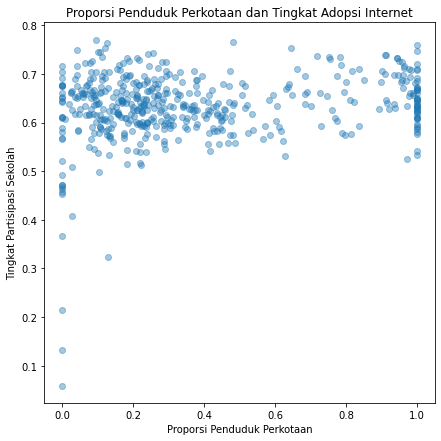

In [54]:
# Urbanisasi
x_age = df_grouped["urban"]
y_age = df_grouped["school_participation"]

# Plot
plt.scatter(x_age, y_age, alpha=0.4)
plt.title('Proporsi Penduduk Perkotaan dan Tingkat Adopsi Internet')
plt.xlabel('Proporsi Penduduk Perkotaan')
plt.ylabel('Tingkat Partisipasi Sekolah')
plt.rcParams['figure.figsize'] = [7,7]
plt.show()


# Regression (Comparing Collapsed Data with Original Data)

In [14]:
# Using Individual Level Data (Weighted)

x = df_sliced[['log_exp_cap','urban','yrs_school','UMUR']]
y = df_sliced['inet_access']
w = df_sliced['WEIND']
x = sm.add_constant(x)

est_1 = sm.WLS(y,x,weights=w)
reg_1 = est_1.fit()

wls_reg_1 = pd.concat([reg_1.params,reg_1.tvalues],axis=1)
wls_reg_1.columns=['Coefficient','t-values']
wls_reg_1


,Coefficient,t-values
const,-1.256305,-165.245690
log_exp_cap,0.093980,154.735430
urban,0.024464,31.529551
yrs_school,0.024132,233.535299
UMUR,-0.002107,-58.741006


In [15]:
# Using District Level Data (Weighted)

x = df_grouped[['log_exp_cap','urban','yrs_school','UMUR']]
y = df_grouped['inet_access']
w = df_grouped['WEIND']
x = sm.add_constant(x)

est_2 = sm.WLS(y,x,weights=w)
reg_2 = est_2.fit()

wls_reg_2 = pd.concat([reg_2.params,reg_2.tvalues],axis=1)
wls_reg_2.columns=['Coefficient','t-values']
wls_reg_2


,Coefficient,t-values
const,-1.389160,-13.888493
log_exp_cap,0.094802,12.488187
urban,0.088620,11.508931
yrs_school,0.014490,7.895501
UMUR,0.002166,3.597035


In [16]:
# Using District Level Data (Unweighted)

x = df_grouped[['log_exp_cap','urban','yrs_school','UMUR']]
y = df_grouped['inet_access']
w = df_grouped['WEIND']
x = sm.add_constant(x)

est_3 = sm.OLS(y,x)
reg_3 = est_3.fit()

wls_reg_3 = pd.concat([reg_3.params,reg_3.tvalues],axis=1)
wls_reg_3.columns=['Coefficient','t-values']
wls_reg_3


,Coefficient,t-values
const,-0.874774,-10.190028
log_exp_cap,0.064001,9.968514
urban,0.116321,16.593238
yrs_school,0.007439,5.291197
UMUR,0.000029,0.050676
